<a href="https://colab.research.google.com/github/MalenaGlez/TFG-CNN-Resonancias/blob/main/Filtros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Código para mostrar las imágenes cuando se le saplica un filtro

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importaciones
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Rutas de los datos ya procesados:
processed_dir = '/content/drive/My Drive/processed_data'
train_dir = os.path.join(processed_dir, 'train')

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

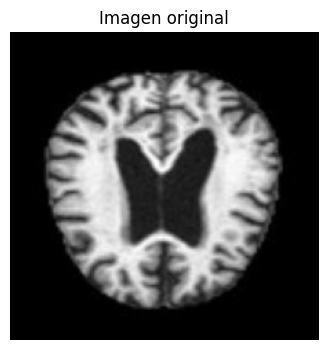

In [ ]:
ruta_alzheimer = os.path.join(train_dir, 'alzheimers_dataset')
images = os.listdir(ruta_alzheimer)
ruta_img = os.path.join(ruta_alzheimer, images[5])
img = cv2.imread(ruta_img, cv2.IMREAD_GRAYSCALE)

# Mostrar resultados
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen original')
plt.axis('off')



Definimos la operación correlación cruzada:

In [ ]:
def corr_c(X,K):
    """
    Función que devuelve la visualización de la imagen X con el kernel K.
    Con ella se realiza la correlación cruzada entre dos matrices, sin paddin
    """
    n, m = X.shape
    p, q = K.shape

    # Matriz de salida (Z=X*K) SIN padding
    Z_row = n-p+1
    Z_col = m-q+1
    Z = np.zeros((Z_row, Z_col))

    for i in range(Z_row):
        for j in range(Z_col):
          # Multiplicamos elemento a elemento el kernel K
          # por la región de la matriz X que queda debajo de K
            Z[i,j] = np.sum(X[i:i+p, j:j+q]*K)

    return Z


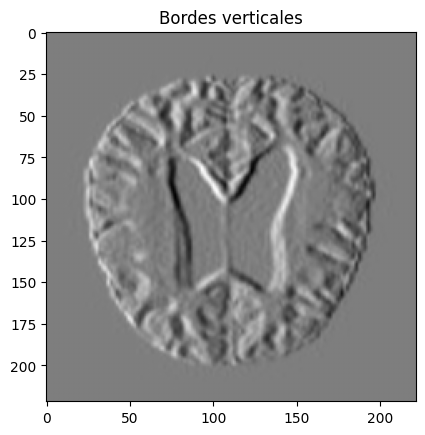

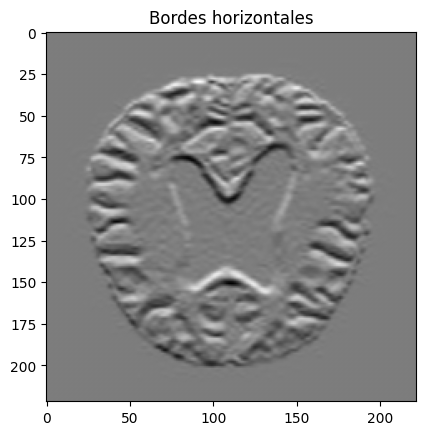

In [ ]:
# Filtro que muestra
K_horizontal = np.array([[-1, -2, -1], [0, 0, 0],[1, 2, 1]])
K_vertical = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

Z_vertical = corr_c(img, K_vertical)
plt.imshow(Z_vertical, cmap='gray')
plt.title('Bordes verticales')
plt.show()

Z_horizontal = corr_c(img, K_horizontal)
plt.imshow(Z_horizontal, cmap='gray')
plt.title('Bordes horizontales')
plt.show()

Comparativa de las tres imágenes:

(np.float64(-0.5), np.float64(221.5), np.float64(221.5), np.float64(-0.5))

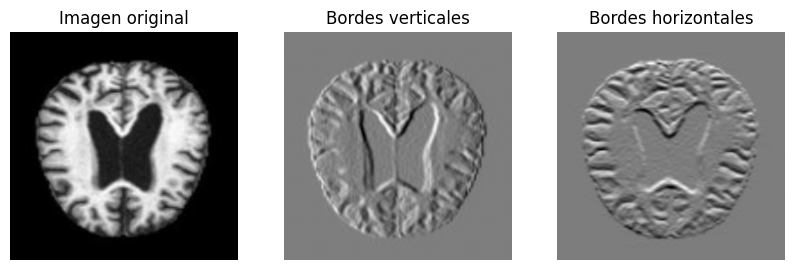

In [ ]:
plt.figure(figsize=(10, 4))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

# Imagen bordes verticales
plt.subplot(1, 3, 2)
plt.imshow(Z_vertical, cmap='gray')
plt.title('Bordes verticales')
plt.axis('off')

# Imagen bordes horizontales
plt.subplot(1, 3, 3)
plt.imshow(Z_horizontal, cmap='gray')
plt.title('Bordes horizontales')
plt.axis('off')